# Random Sample Imputation

-  Random Sample Imputation take a random observation from the feature.
-  After that we use random observation to replace NaN in that feature.
-  It should be used when data is missing completely at  random (MCAR)

### Import Required Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading dataset

In [2]:
df = pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


### Check null values

In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

    - There is 177 null values are present in Age feature.

##  Now, we replace this NaN by using Random Sample Imputation

In [11]:
df['Age'].dropna().sample()

137    37.0
Name: Age, dtype: float64

    - where .dropna() function drop all nan values in that feature and .sample() function return any one random value

In [23]:
df['Age'].dropna().sample(df['Age'].isnull().sum())

37     21.0
323    22.0
492    55.0
377    27.0
855    18.0
       ... 
646    19.0
332    38.0
376    22.0
44     19.0
699    42.0
Name: Age, Length: 177, dtype: float64

    - this function check where is null values are present and replace Nan with random sample

In [24]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

    - This function check where is null values are present and replace Nan with random sample
    - We use random_state because it replace NaN with specific value only ( if we not use random_state then values change evrytime when we run .)

In [26]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

    - This line of code return a index where Age is NaN

### Create A function which Replace NaN with Random Sample
- Here we creating a two new features Age_median and Age_random 
- In Age_median replace NaN with Median and In Age_random replce NaN with Random Sample 

In [28]:
def RSI(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)#replace Nan with median
    df[variable+'_random'] = df[variable]#Copy feature into new feature
    #calculate random smaple and store into random_sample_values
    random_sample_value = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    #in random_sample_value all filled nan values are present now we want to put/merge this all filled values in our dataset
    # for this we want to match all nan values index in random_sample_values with df[variavle_'random] 
    #Pandas need to have same index in order to merge dataset
    random_sample_value.index = df[df[variable].isnull()].index#find index of NaN values in feature
    #now put a condition where ever it is null with loc function then replace with random_sample_values
    df.loc[df[variable].isnull(),variable+'_random'] =random_sample_value

- calculate median

In [29]:
median = df['Age'].median()

- Call Function
    - RSI('dataframe','Feature','median')


In [33]:
RSI(df,'Age',median)

In [31]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


### plot graph between Age, Age_median , Age_random

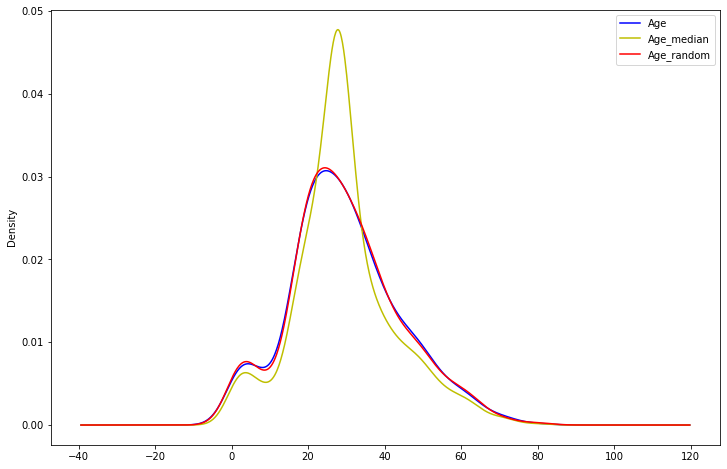

In [54]:
plt.figure(figsize=(12,8))
df.Age.plot(kind='kde',color='b')
df.Age_median.plot(kind='kde',color='y')
df.Age_random.plot(kind='kde',color='r')
plt.legend()

#### Note: 
- from plot we can say that Random Sample Imputation work better than Mean Median Mode imputation is some cases.
- When we use Median to fillna there is Distortion
- There is Less distortion in random sample
- In every cases random sample imputation wont work

### Please drop a comment and share your feedback 👍🏻
## Thank you 😇😇 !